In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [16]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv(r'Arima\Datasets\AirPassengers.csv')

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [13]:
df.shape

(144, 2)

In [5]:
df['Month'] = pd.to_datetime(df['Month'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.set_index('Month', inplace=True)

In [8]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


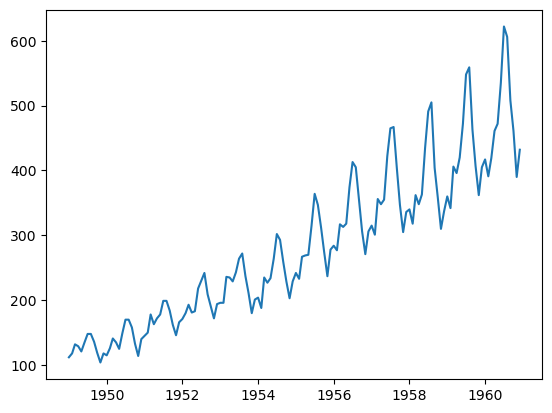

In [9]:
plt.plot(df)

In [10]:
df['rollMean'] = df['#Passengers'].rolling(window=12).mean()
df['rollStd'] = df['#Passengers'].rolling(window=12).std()

<Axes: xlabel='Month', ylabel='#Passengers'>

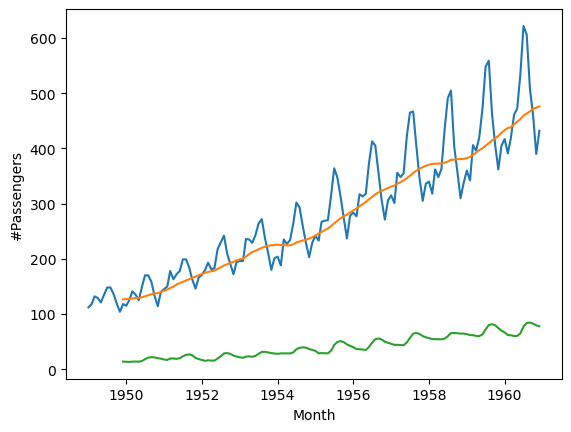

In [15]:
sns.lineplot(data=df, x=df.index, y=df['#Passengers'])
sns.lineplot(data=df, x=df.index, y=df['rollMean'])
sns.lineplot(data=df, x=df.index, y=df['rollStd'])

In [17]:
adfTest = adfuller(df['#Passengers'], autolag='AIC')
adfTest

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [21]:
for key, val in stats.items():
    print('Criticality', key, ":", val)

Criticality Test Statistic : 0.8153688792060511
Criticality p-value : 0.991880243437641
Criticality #lags used : 13.0
Criticality number of observations used : 130.0


In [40]:
def test_stationarity(df, col):
    df['rollMean'] = df[col].rolling(window=12).mean()
    df['rollStd'] = df[col].rolling(window=12).std()

    adfTest = adfuller(df[col], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic','p-value','#lags used','number of observations used']) 
    print(stats)
    for key, values in adfTest[4].items():
        print('criticality',key,":",values)

    sns.lineplot(data=df, x=df.index, y=df[col])
    sns.lineplot(data=df, x=df.index, y=df['rollMean'])
    sns.lineplot(data=df, x=df.index, y=df['rollStd'])


## Shift

In [30]:
air_df = df[['#Passengers']]
air_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [35]:
air_df['shift'] = air_df['#Passengers'].shift()
air_df['ShiftDiff'] = air_df['#Passengers'] - air_df['shift']
air_df.head()

,#Passengers,shift,ShiftDiff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


Test Statistic                  -2.657779
p-value                          0.081634
#lags used                      12.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


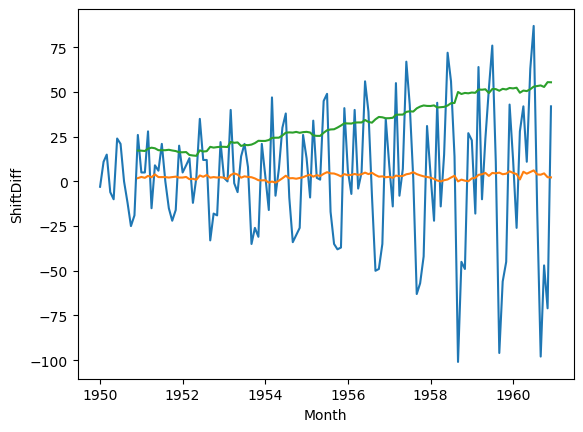

In [41]:
test_stationarity(air_df.dropna(), 'ShiftDiff')

## Log

In [43]:
log_df = df[['#Passengers']]
log_df['log'] = np.log(log_df['#Passengers'])
log_df.head()

,#Passengers,log
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


Test Statistic                  -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


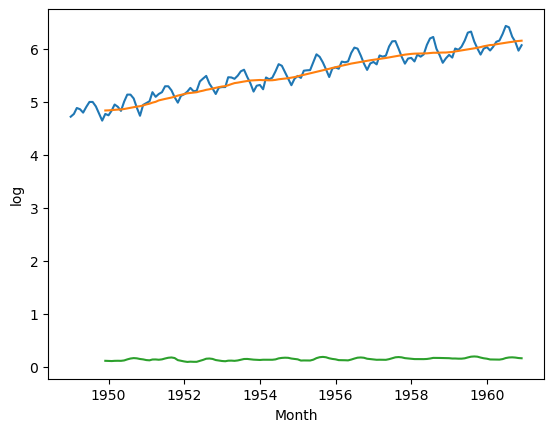

In [44]:
test_stationarity(log_df, 'log')

## SQRT

In [46]:
sqrt_df = df[['#Passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['#Passengers'])
sqrt_df.head()

,#Passengers,sqrt
Month,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


Test Statistic                  -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


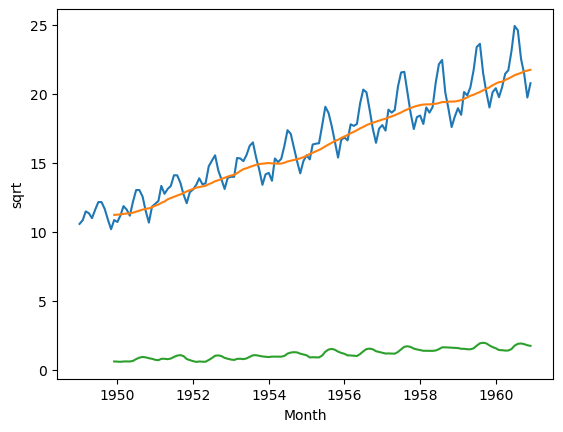

In [47]:
test_stationarity(sqrt_df, 'sqrt')

## CBRT

In [48]:
cbrt_df = df[['#Passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['#Passengers'])
cbrt_df.head()

,#Passengers,cbrt
Month,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


Test Statistic                  -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


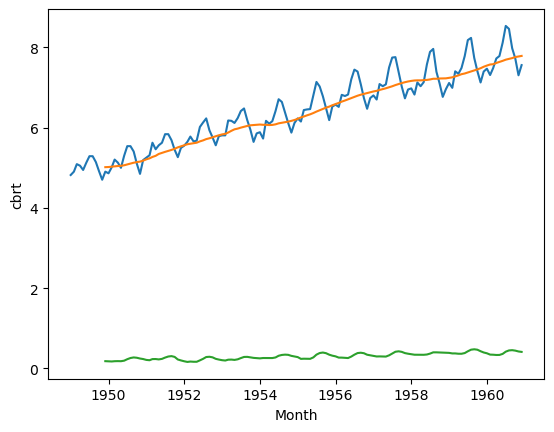

In [49]:
test_stationarity(cbrt_df, 'cbrt')

## Log + SQRT

In [51]:
log_df2 = log_df[['#Passengers', 'log']]
log_df2['logSqrt'] = np.sqrt(log_df2['log'])
log_df2['logDiff'] = log_df2['logSqrt'] - log_df2['logSqrt'].shift()
log_df2.head()

,#Passengers,log,logSqrt,logDiff
Month,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


Test Statistic                  -3.071912
p-value                          0.028703
#lags used                      13.000000
number of observations used    118.000000
dtype: float64
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913


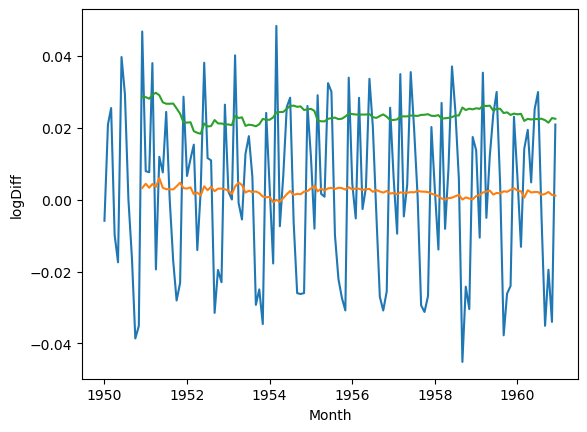

In [53]:
test_stationarity(log_df2.dropna(), 'logDiff')